In [1]:
%%html
<link href='https://fonts.googleapis.com/css?family=Roboto' rel='stylesheet'>
<style>
body {
    font-family: 'Roboto', 'Helvetica', sans-serif; 
    font-size: 12px;
}
</style>

# Profiling States Using Yelp Data by Revealing the Dominant Categories of Businesses


In [2]:
# Import packages
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import json
import re
import os

from PIL import Image

from IPython.display import HTML, display
import pprint

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Create toggle cell button
font = "Roboto-Regular.ttf"
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.output {
    display: flex;
    align-items: left;
    text-align: justify;
}

</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')


# Executive Summary

The Covid 19 pandemic has devastated tourism for many states and cities. Using the data from Yelp, our LT wanted to determine a method whereby we can systematically analyze and present the appeal of states to encourage tourists and residents to visit and bring in much needed revenue in the aftermath of the pandemic. The group utilized the Yelp Open Dataset which was intended to be shared for educational and personal exploration purposes. The data set contains a subset of the Yelp’s containing data of some states from the US and Canada.

For the analysis, the group followed a methodology consisting of Data Familiarization, Preprocessing, Exploratory Data Analysis (Category Analysis, Reviews Word Frequency Analysis, Attributes Analysis), and finally State Profiling.

The results of our methodology are as follows: The top 9 states on YELP comprise the 98% of establishments reviewed. These are: Arizona (AZ), Nevada (NV), Ohio (OH), North Carolina (NC), Pennsylvania (PA) and Wisconsin (WI) which are located in the United States and Quebec (QC), Alberta (AB) and Ontario (ON) which are located in Canada.

Alberta is a Chomp and Shop state. Its Yelp businesses concentrated on Restaurants, followed by Shopping, Food, Beauty and Spas, and Automotive. Its Food businesses are highly rated, with 69% of the reviews having a rating of 3.5 or higher. They also offer amenities such as business parking for 32% of their establishments, bike parking for 35% of their establishments, and restaurant take-out for 33% of their establishments.

Arizona is a Shop, Heal, Chill state. Its Yelp businesses are mostly Restaurants, followed by Shopping, Health and Medical, Home Services, then Beauty and Spas. Among these general categories, its highest rated are businesses that are classified as Beauty and Spas, with 81% of businesses having a 3.5 rating or higher. Looking at amenities, 74% of their businesses accept credit cards, 31% offer bike parking and 29% offer business parking. Many positive reviews by customers are mentioned “happy hours”, “go back”, and generally positive comments on restaurant food.

North Carolina is a Shop and Chill state. Its common Yelp businesses are Restaurants, then Shopping, Food, Beauty and Spas and lastly, Health and Medical. Its Food businesses as its highest rated, with 75% of its businesses having a 3.5 rating or higher. Around 75% of its businesses accept credit cards as well. Frequent keywords used in customer reviews include “restaurant”, “delicious”, “burger”, “fried chicken”, and “drink”.

Nevada is a Shop, Heal, Chill state. Its common Yelp businesses are Restaurants at the top, followed by Shopping, Health and Medical, Beauty and Spas then Home Services. Beauty and Spas are positively viewed with 82% of establishments rated 3.5 or higher. Its amenities include parking which 32% of establishments have, bike parking which 30% of its establishments have, 74% of its establishments accept credit cards, and 22% are good for kids. Common keywords used in reviews include “las vega”, as it is near Las Vegas and may be popular to visitors. Many customers also mentioned keywords such as “come back”, “crab leg”, and positive praises for food.

Ohio is a Chomp and Shop state. Its Yelp businesses concentrate on Restaurants, followed by Shopping, Food, Beauty and Spas, then Automotive. Food businesses stand out with their good ratings at 77%. Businesses also commonly accept credit cards, with 74% offering this amenity. 34% of businesses offer business parking and 34% offer restaurant takeout. Common keywords used in customer reviews include praises such as: “delicious”, “good” and “amazing” and nouns like “burger” and “Cleveland”.

Ontario is a Chomp and Shop state. Its Yelp businesses are most commonly Restaurants, Food and Shopping, Beauty and Spas, and Nightlife. 65% of Ontario’s food businesses are rated good with customers particularly noting desserts in their reviews. Amenities offered are: Restaurant take out which is offered by 41% of businesses, followed by bike parking offered by 40% of business, then business parking offered by 37% of business. 34% of its businesses are also good for kids. Customer reviews frequently used the words “good”, “delicious” and “amazing”. They also heavily mentioned “ice cream” and “dessert”.

Pennsylvania is a Shop and Chill state. Its Yelp businesses are mostly Restaurants, followed by Shopping, Food, Beauty & Spas then Automotive. Among these, Food is the most highly rated with 76% of its businesses receiving good ratings. Customers left positive reviews on their burgers, drinks, dinner and mentioned Pittsburgh (one of its popular cities) numerous times. A notable amenity that is offered by around 3 out of 4 businesses is payment through credit cards, and 37% of its businesses offer business parking, while 33% offer bike parking.

Quebec’s Yelp businesses have a specific focus on restaurants and food establishments, and the group has called Quebec the Foodie state. Quebec’s Food establishments stand out with 84% of its businesses receiving good ratings. Customers left positive reviews about the state’s smoked meat, foie gra, and bagels. A notable amenity that is offered by nearly half its businesses is restaurant takeout. 

Wisconsin’s most common Yelp businesses are Restaurants, Shopping, Food, Beauty & Spas, and Automotive. Because of this, our group has called Wisconsin the Shop and Chill state. Among these, Food businesses are the highest rated with 77% having good ratings. Customers mention cheese curd (a local delicacy), burgers and pizza numerous times in their positive reviews. Wisconsin has the highest percentage of businesses with parking (41%) and bike parking (43%) among the top 9 states. Additionally, around 3 out of 4 businesses accept credit cards.


Despite the positive results of the study, the group acknowledges that this study can be improved further.

Given more time to process the data, our group would have wanted to also process the check-in information and the other amenities which might reveal interesting insights.

This study could be improved by getting more information regarding the states and getting more reviews per state.  Furthermore, some of the attributes did not have sufficient data. More information would have provided more context to the group’s insights.

The study could also be augmented with other sources of information such  as Twitter, Instagram and Facebook. While Yelp is a rich source of information especially when it comes to reviews of establishments, not everyone uses Yelp. There are those who prefer Twitter, Facebook and Instagram.

Ultimately, it seems possible to extend this study in the future by utilizing this same method to analyze cities in the Philippines and begin to attract tourists to bring the Philippines back on the road to recovery. Since Yelp is not commonly used in the Philippines, a possible replacement for the source of information would be TripAdvisor.


# Problem Statement

A city’s establishments are its lifeblood - businesses both big and small provide employment and enjoyment to citizens and provide taxes to the public sector. Cities grow to have their own identities and personalities, for example: Makati is known for its traditional business district, skyscrapers, and traffic enforcers while BGC is known to be trendier, with its business district growing alongside its recreational establishments. However, a city may not be readily aware of its offerings to the public and may not understand what it can do to improve the collection of its establishments in order to draw more visitors.

**The goal of our analysis is to describe the identity of a city by studying their dominant Yelp establishments and possibly use this information to identify opportunities for the city.**

Each city’s dominant identity can be used to create complementary businesses that would benefit the city and its existing patrons. For example, a city with plenty of highly rated spas marketed towards moms might want to set up day care centers nearby. Tired moms who want to treat themselves to a spa day could then leave their kids at nearby day care centers, and these centers would provide jobs to citizens and income for the city. With knowledge of city profile/identity, cities can promote themselves to tourists by emphasizing categories aligned with their areas of strength. Travel agencies can use such information to suggest potential destinations based on similar traveller interests. 


# Motivation

At the height of the Covid 19 pandemic, many states and cities suffered from a lack of tourists. Lockdowns and travel limitations affected the revenue of many states in the United States and Canada. 
Using the data from Yelp, our LT wanted to determine if we could come up with a method whereby we can analyze the strengths, attractions and appeal of states so that they can coax tourists and residents to visit their states and bring in much needed revenue.

In this study, we look specifically at 9 states that had ample data available in the Yelp database. However, this process of analysis can be done to help states recover from the impact of Covid on their tourism. This can be extended to provinces in the Philippines if the data is available. Our bigger objective is to come up with learnings and a method that we can use to help other places and cities, especially those in the Philippines. 


# Data Description

The data used for this report was obtained from the [Yelp Open Dataset](https://www.yelp.com/dataset). The Yelp Open Dataset contains a subset of the Yelp’s data intended to be shared for educational and personal exploration purposes available at .

For this report, the primary dataset used was the *business.json* file which contains information regarding business entities. Each row represents one business and each column represents a characteristic of the business such as state, rating and other various attributes. A total of 209393 businesses in North America are included in the dataset.

The *review.json* dataset was used to provide additional information on the information taken from business.json. Each row represents one review and each column represents a characteristic of that review such as the user_id, rating, text and other various attributes. The review.json contains 8021122 total reviews and 1968703 total users.


# Methodology

1. **Data Familiarization** - The group began with data familiarization by inspecting each of the available datasets in the Yelp database and made the decision to focus on yelp_academic_dataset_business.json and yelp_academic_dataset_review.json (insert link to data profiling notebook) to address our problem statement.
2. **Preprocessing** - The group then considered what information we would need to solve our stated problem and how we would need to format the data in order for it to be usable for visualizations. To be able to use the data, we had to process some aspects of the database, the first was to assign a dominant, general category for each business from a pool of categories. To do this, we created general categories based on the most frequently occurring tag in the category column. [add description of preprocessing of attributes][word cloud][categories](see data processing below) (insert link to data processing notebook) 
3. **Exploratory Data Analysis** - We then identified the top 5 general categories per state based on the largest counts of businesses classified under those categories. We then plotted this into a bar graph to easily see the categories with the larger counts
    - Category Analysis - The group then wanted to verify how each of the categories are seen positively or negatively, so the group plotted the distribution of the ratings for each category. The ratings were simplified into good, neutral, or bad, then plotted as a stacked bar chart.
    - Reviews Word Frequency Analysis - To drill down further, the group looked for frequently occurring words from reviews from the 100 most reviewed businesses for those particular states.  Only reviews from businesses with enough data were included  in order to prevent biased reviews from skewing the results.
    - Attributes Analysis - Finally, the group obtained the seven most common attributes users tagged  in their establishment and plotted the attributes using a radar chart. The 7 most common attributes would be good indicators of what reviewers deemed to be important attributes in the establishments.
4. **State Profiling** - Using the combined information from categories, select attributes, and reviews, we will be personifying the states. 

# Data Processing

### 1. Pre-processing: business.json

The business.json data was extracted from path `/mnt/data/public/yelp/dataset` in Jojie. Pandas.json_normalize was used to obtain nested attributes for business.json. The initial data contained 209393 rows and 60 columns. 

We then identified the data types of the values under each column and an initial data profiling was done to understand the extent of the data which led to the following important observations:
Categories are in the form of a list of varying length
Attributes contain entries of different formats - each attribute may have sub-attributes as dictionaries with keys for each sub-attributes with ‘True’, ‘False’, or ‘Null’ for the final values for the sub-attributes

To address the issue on categories, a list of major categories and sub-categories were scraped from [Yelp Category List](https://blog.yelp.com/2018/01/yelp_category_list). For every row, each subcategory tagged was classified under the correct major category. The major category with the most number of subcategories was chosen to be the general category for that row. It is noted by the group, however, that there may be limitations to the accuracy of the tagged categories provided by the Yelp dataset given that there is no strict requirement in Yelp.com for a business to use a specific tag.  

To address the issue on attributes, the group converted the sub-attributes into their own columns. Furthermore, analyzing the data set, the group has determined that the following attributes contain at least 30% non-null values and that these values are what most users look for in establishments, since they took the time to tag these in YELP. These attributes are ‘BusinessAcceptsCreditCards’, ‘BikeParking’, ‘GoodForKids’, ‘RestaurantsPriceRange2’, ‘BusinessParking’, ‘Wifi’, and ‘RestaurantsTakeOut’.

After preprocessing the data, the following columns were used: 
`Business_id`, `state`, `stars`, `review_count`, `gen_category`, `attributes.BusinessAcceptsCreditCard`, `attributes.BikeParking`, `attributes.GoodForKids`, `attributes.RestaurantsPriceRange2`, `attributes.RestaurantsTakeOut`, `attributes.WiFi`, `attr.parking.garage`, `attr.parking.street`, `attr.parking.validated`, `attr.parking.lot`, `attr.parking.valet`. A final dataset containing 208869 rows and 16 columns after data processing was saved as `yelp_processed_data.csv`.

### 2. Pre-processing: review.json

The **review.json** data was extracted from path `/mnt/data/public/yelp/dataset` in Jojie and was loaded in chunks of 100,000 through Pandas read_json. For each chunk, we mapped the values of categories and general categories using the respective business_ids of each review. For each state, we only extracted reviews that rated at least 3 stars to capture the positive sentiments towards each business. Additionally, we only included reviews that are for businesses that belong to the top 100 businesses in that particular state which is determined by determining top 100 reviewed businesses and afterwards ordering these 100 businesses by star rating. Corresponding .csv files of the reviews for the top 100 businesses were created for each state with the filename format `processed_review_{state}.csv`. This data was used to generate word clouds that would capture positive sentiments for businesses in each state.

### 3. Data Aggregation

Yelp_processed_data.csv was further transformed to obtain the data needed for the analysis. 

To obtain **df_top5_cats.csv**, we found the counts of businesses for each general category per state. We then took the top 5 categories of each state, and computed their percentages with respect to the total number of businesses in each state.

To obtain **ratings.csv**, the group decided to look into the distribution of the star ratings for each of the top 5 categories per state. The group decided to set the ‘neutral’ baseline at 3, because of the human tendency to designate middle as average, then ratings below the average (2.5 and lower) as ‘bad’ ratings, and ratings above the baseline (3.5 and higher) as ‘good’ ratings. We also did not include businesses with less than the average number (37) of reviews for each category. The percent of good, neutral and bad were then obtained for each of the categories of every state. 

To obtain **radar.csv**, the frequency of each of the attributes was measured as a percentage from the entire pool of businesses.

To obtain **map.shp**, a shapefile of the political boundaries of states of North America was obtained from the [Commision for Environmental Cooperation](http://www5.cec.org/sites/default/files/Atlas/Files/'Political_Boundaries/PoliticalBoundaries_Shapefiles.zip). From this shapefile non-USA and Canada rows were removed as well as the rows that correspond to water. State abbreviation was then extracted from the column STATEABB. Lastly, the count of establishments per state from yelp_processed_data.csv was merged to the shapefile. 

# Exploratory Data Analysis

Established in 2004, Yelp is a popular on-line directory for business establishments. Yelp features local business establishments, user reviews and recommendations for all types of businesses. Some of the establishments that are covered in Yelp are restaurants, bars, cafes, spas. Aside from posting reviews on the establishments, users are also encouraged to provide information on amenities that are provided by the business establishments. Yelp operates in over 200 cities in 32 countries. 

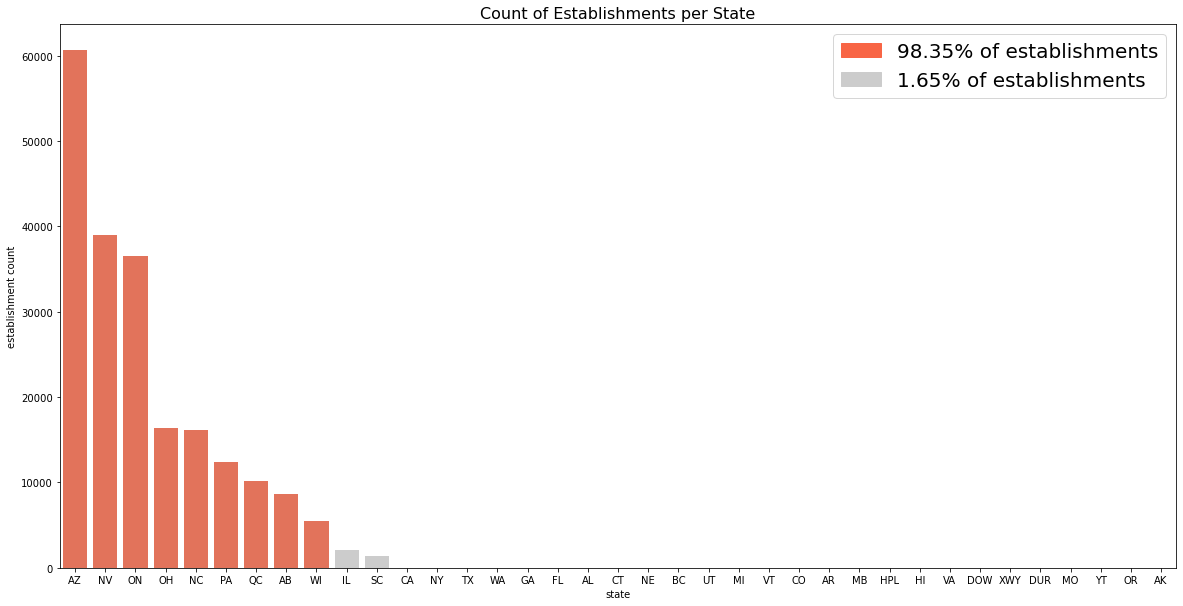

In [4]:
# Create count of establishment per state

df = pd.read_csv('./post_processed_data/yelp_processed_dataset.csv')

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'establishment count']

f, ax = plt.subplots(figsize=(20, 10))

top_states = ['AZ', 'NV', 'ON', 'OH', 'NC', 'PA', 'QC', 'AB', 'WI']
clrs = ['#F86545' if (x in top_states) else '#CCCCCC'
        for x in state_counts['state']]

sns.barplot(x=state_counts['state'], y=state_counts['establishment count'],
            palette=clrs, ci=None)
ax.set_title('Count of Establishments per State', fontsize=16)

orange_patch = mpatches.Patch(color='#F86545',
                              label='98.35% of establishments')
grey_patch = mpatches.Patch(color='#CCCCCC',
                            label='1.65% of establishments')

plt.legend(handles=[orange_patch, grey_patch], loc='upper right',
           prop={'size': 20})
plt.show()


<div align="center"> <h4 align="center"> Figure 1. Number of Businesses per State</h4> </div>

This academic dataset, however, contains only 35 states or provinces in the USA and Canada. Furthermore, only 9 of these states or provinces already contain 98% of the businesses. In this report, our objective is to be able to characterize these 9 states, which are Arizona (AZ), Nevada (NV), Ontario (ON), Ohio (OH), North Carolina (NC), Pennsylvania (PA), Quebec (QC), Alberta (AB) and Wisconsin (WI).

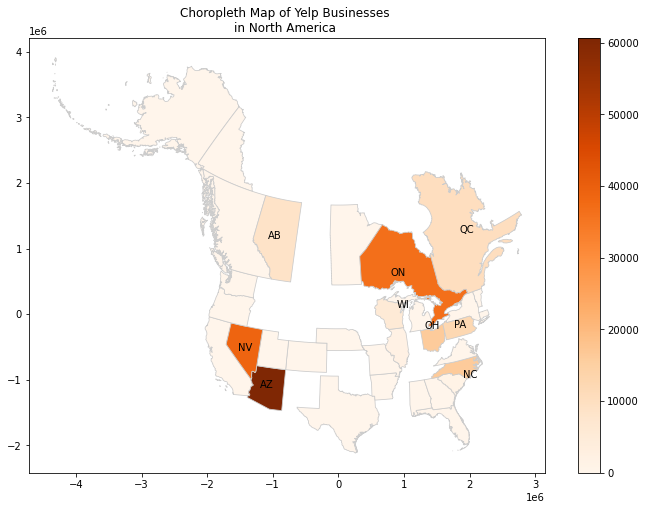

In [5]:
# Create North America map

df_geo = gpd.read_file('./post_processed_data/map.shp')

df_geo2 = df_geo.drop_duplicates(subset='state_1', keep='first')
df_geo2['coords'] = (df_geo2['geometry'].apply(
    lambda x: x.representative_point().coords[:]))
df_geo2['coords'] = [coords[0] for coords in df_geo2['coords']]

variable = 'business_i'
vmin, vmax = df_geo2["business_i"].min(), df_geo2["business_i"].max()

fig, ax = plt.subplots(1, figsize=(12, 8))

df_geo.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax,
            edgecolor='0.8', vmin=0, vmax=vmax)
rows = []
for idx, row in df_geo2.iterrows():
    if row[1] not in rows:
        if row['business_i'] > 3000:
            rows.append(row[1])
            plt.annotate(row['state_1'], xy=row['coords'],
                         horizontalalignment='center')

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0,
                                                              vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.title('Choropleth Map of Yelp Businesses \nin North America ')
plt.show()


<div align="center"> <h4 align="center"> Figure 2. States in North America </h4> </div>

Arizona (AZ), Nevada (NV), Ohio (OH), North Carolina (NC), Pennsylvania (PA) and Wisconsin (WI) are located in the United States. Quebec (QC), Alberta (AB) and Ontario (ON) are located in Canada.

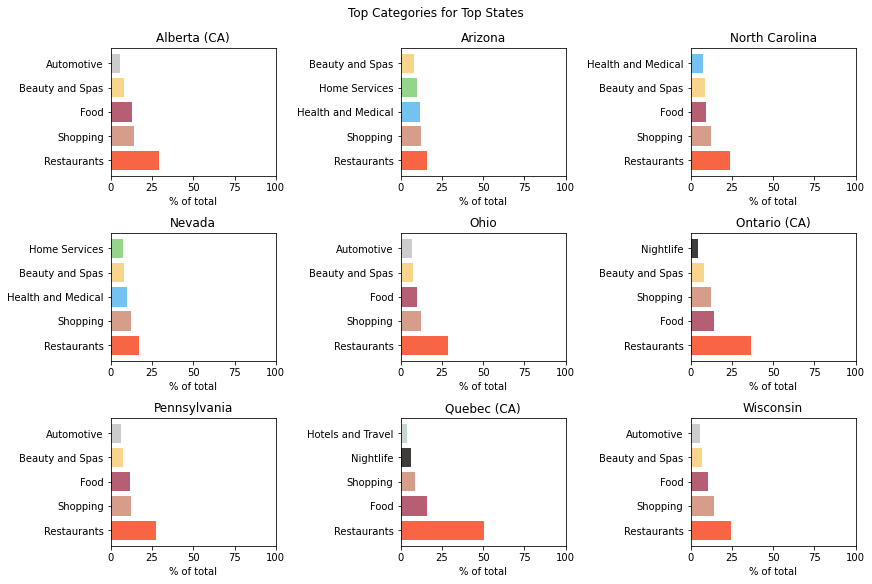

In [6]:
# Create top categories per state

state_list = sorted(['AZ', 'NV', 'ON', 'OH', 'NC', 'PA', 'QC', 'AB', 'WI'])
state_dict = {'AZ': 'Arizona', 'NV': 'Nevada', 'ON': 'Ontario (CA)',
              'OH': 'Ohio', 'NC': 'North Carolina', 'PA': 'Pennsylvania',
              'QC': 'Quebec (CA)', 'AB': 'Alberta (CA)', 'WI': 'Wisconsin'}
colors = ['#F86545', '#D69D8B', '#b55e74', '#F8D48D', '#CCCCCC', '#74C2F1',
          '#93D68B', '#3E3D3B', '#C6D8CC', '#8C8380', '#F3E7D2', '#F5D8A7',
          '#B6D0E1', '#CBDEED', '#D9C1B8', '#5F84A1']

df_top5_per_state = pd.read_csv('./post_processed_data/df_top5_cats.csv')

cat_top = df_top5_per_state['general_categories'].unique()
cat_colors = dict(zip(cat_top, colors[0:len(cat_top)]))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8),
                         constrained_layout=True)


for i, s in enumerate(state_list):
    axes[i//3, i % 3].set_title(state_dict[state_list[i]])

    # choose the state
    state = state_list[i]
    df_state = df_top5_per_state[df_top5_per_state['state'] == state]

    axes[i//3, i % 3].barh(df_state['general_categories'],
                           df_state['% of total'],
                           color=[cat_colors[x] for x
                                  in df_state.general_categories.unique()])
    axes[i//3, i % 3].set_title(state_dict[state])
    axes[i//3, i % 3].set_xlabel('% of total')
    axes[i//3, i % 3].set_xticks([0, 25, 50, 75, 100])

fig.suptitle('Top Categories for Top States')
plt.show()


<div align="center"> <h4 align="center"> Figure 3. States and their Top 5 Business Categories </h4> </div>

We analyzed the different states and inspected the general categories of their establishments. We limited the scope to the 9 states which account for over 98% of the establishments reviewed in Yelp.​​

To better understand the profiles of each state, we inspected what the top 5 most popular general categories were for each. To determine this, we found the counts of businesses for each general category per state. We then took the top 5 categories of each state, and computed their percentages with respect to the total number of businesses in each state.

From the figures, we can see that the most popular categories are restaurants and shopping. However, the percentages of these differ from state to state. 

For Quebec, 50% of the establishments are restaurants. For Alberta, Ohio, Ontario, Pennsylvania and Wisconsin, the restaurants are in the 25 to 35 percent range. For Arizona, North Carolina and Nevada, the restaurants comprise only 20 to 25 percent of the establishments.

For 8 of the 9 states that we are analyzing, the shopping category is the second most popular category and comprises 10 to 20 percent of the establishments. The only exception is Quebec that has food for its second most popular category with 13 percent.

For Alberta, Ohio, Ontario, Pennsylvania and Wisconsin, their third most popular category is food and comprises 10 to 20 percent of the establishments. For Arizona and Nevada, Health and Medical is the third most popular category and comprises 10 to 20 percent of their establishments. For North Carolina, the third most popular category is Beauty and Spa, comprising 8 percent of the establishments. Quebec has shopping for its third category comprising 10 percent.


In [7]:
# Create function for the ratings stacked bar


def df_rate(db, db_r, state):
    db = db[['state', 'general_category', 'stars']]
    cats = db[db['state'] == state]
    cat_counts = cats['general_category'].value_counts()[:5]
    cat_name = cat_counts.index.tolist()

    df_stars = (db_r[(db_r['state'] == state) &
                     ((db_r['general_category'] == cat_name[0]) |
                      (db_r['general_category'] == cat_name[1]) |
                      (db_r['general_category'] == cat_name[2]) |
                      (db_r['general_category'] == cat_name[3]) |
                      (db_r['general_category'] == cat_name[4]))]
                .sort_values(by='business_id'))
    return df_stars


def star_rate(x):
    if x >= 3.4:
        return 'Good'
    elif x == 3:
        return 'Neutral'
    else:
        return 'Bad'


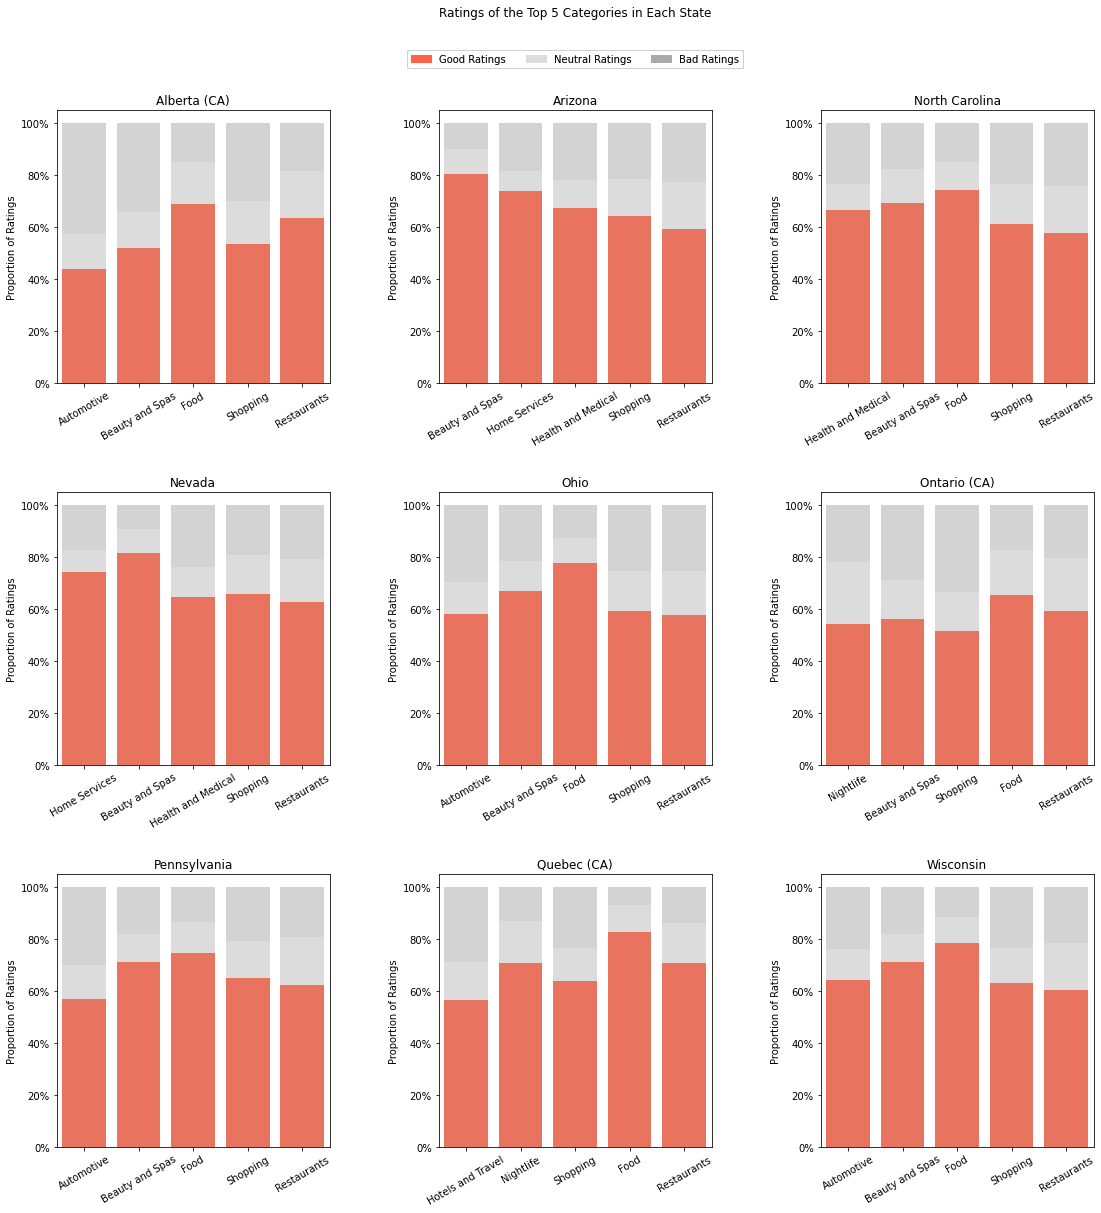

In [8]:
# Create the stacked bar

df_rating = pd.read_csv('./post_processed_data/ratings.csv')

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Ratings of the Top 5 Categories in Each State')

for i, s in enumerate(state_list):
    axes[i//3, i % 3].set_title(state_dict[state_list[i]])

    # filter dataset to current state
    df2 = df_rate(df, df_rating, s)
    # bar chart 1 -> top bars (group of 'rating = bad')
    bar1 = sns.barplot(x="general_category",  y="check", data=df2,
                       color='lightgray', ax=axes[i//3, i % 3])

    # bar chart 2 -> bottom bars (group of 'rating = neutral')
    bar2 = sns.barplot(x="general_category", y="pct_neutgood", data=df2,
                       color='gainsboro', ax=axes[i//3, i % 3])

    # bar chart 3 -> bottom bars (group of 'rating = pct_good')
    bar3 = sns.barplot(x="general_category", y="pct_good", data=df2,
                       color='tomato', ax=axes[i//3, i % 3])

    bar1.set(xlabel=None, ylabel='Proportion of Ratings')
    bar1.set_xticklabels(bar1.get_xticklabels(), rotation=30)
    bar1.set_yticks(range(0, 101, 20))
    ylabels = ['{:g}'.format(x) + '%' for x in bar1.get_yticks()]
    bar1.set_yticks(bar1.get_yticks())
    bar1.set_yticklabels(ylabels)

    # add legend
    top_bar = mpatches.Patch(color='tomato', label='Good Ratings')
    mid_bar = mpatches.Patch(color='gainsboro', label='Neutral Ratings')
    bottom_bar = mpatches.Patch(color='darkgrey', label='Bad Ratings')
    handles, labels = bar1.get_legend_handles_labels()
    fig.legend(loc='upper center', handles=[top_bar, mid_bar, bottom_bar],
               ncol=3, bbox_to_anchor=(0.5, .95))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,
                    hspace=0.4)

# show the graph
plt.show()


<div align="center"> <h4 align="center"> Figure 4. Ratings from Top Categories </h4> </div>

The average distribution for good ratings in a top category is at 65% with a standard deviation of 9%. This emphasizes how much Nevada’s and Arizona’s Beauty & Spas really stand out with their distribution of good ratings at 81% and 80% respectively. Visitors to Nevada and Arizona shouldn’t miss out on the opportunity of a good customer experience at their Beauty & Spa establishments. 

Quebec’s, Ohio’s, and Wisconsin’s Food businesses stand out with distributions of good ratings at 82%, 77%, and 78%. Businesses that had a notably low number of good ratings include Alberta’s Automotive businesses at only 43% good ratings, Shopping at 53%, Beauty and Spas at 52%. In the same vein, Ontario’s Shopping and Nightlife businesses only received 52% and 54% good ratings. This leaves a lot of room for improvement for these businesses.


In [9]:
# Function to create radar chart


def make_spider(df, row, title):
    """Plot Spider chart for specified dataset"""

    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot?
    # We divide the plot / number of variable
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 3, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10, 30, 50, 100],
               ["10", "30", "50", "100"],
               color="grey",
               size=7)
    plt.ylim(0, 100)

    # Ind1
    values = df.loc[row].drop('state').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='#F86545', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='#CCCCCC', alpha=0.4)

    # Add a title
    plt.title(title, size=11, color='#000000', y=1.1)


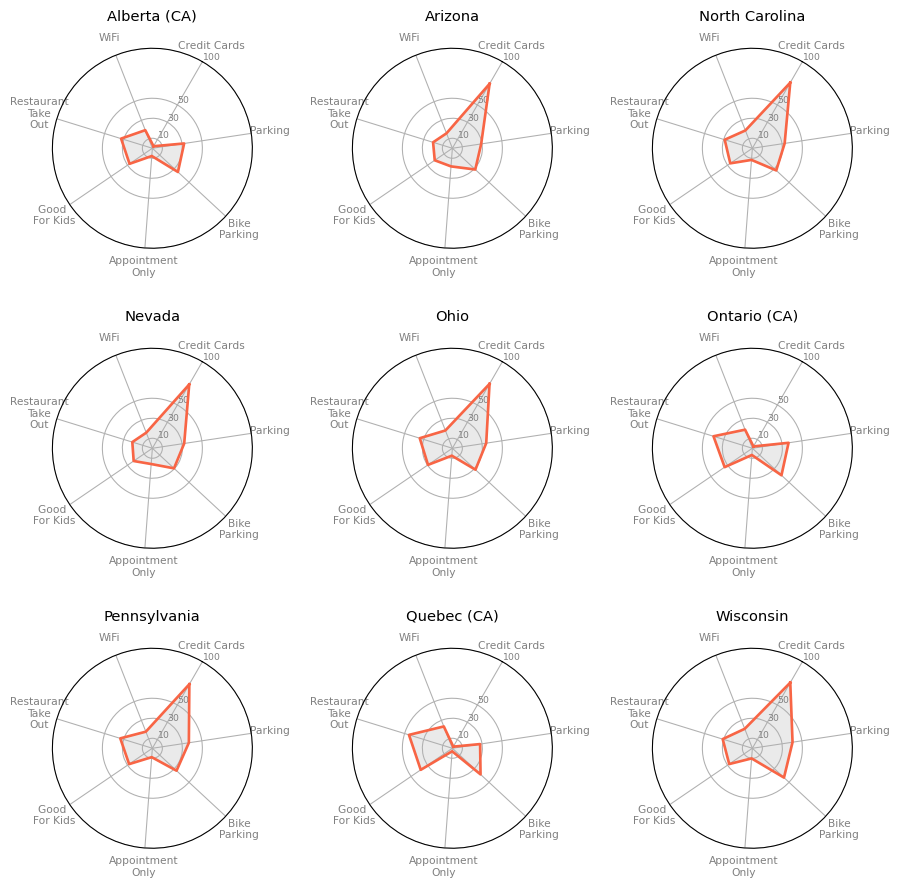

In [10]:
# Plot the radar chart

# Retrieve processed dataset
df_radar = pd.read_csv('./post_processed_data/radar.csv')
df_radar = df_radar.sort_values('state').reset_index(drop=True)

# initialize the figure
my_dpi = 96
plt.figure(figsize=(1000 / my_dpi, 1000 / my_dpi), dpi=my_dpi)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5,
                    hspace=0.5)

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_spider(df_radar, row=row, title=state_dict[state_list[row]])


<div align="center"> <h4 align="center"> Figure 5. Amenities of Different States </h4> </div>

Users reviews on YELP identify the availability of amenities in establishments so that other patrons on the site know what to expect (is there parking?) or use this to narrow down their searches to find particular amenities they require (ie, good for kids). By looking at the totality of this data for establishments in each state in this radar chart, we are able to see each state’s strengths among these amenities as well as compare features among states. 

Most noticeable difference is there presence of 2 dominant shapes formed -- the **mouse pointer** and **bow tie**. **Mouse pointer** states have the characteristic of high acceptance of credit cards across more than 70% of the businesses while **Bow tie** states have the opposite characteristic of the lack of credit card payment option for most of their businesses. Among the top 9 states, the ones located in USA fall under mouse pointer while Canadian states are bow tie. For future visitors to those Canadian states this is a signal to have cash ready to make their purchases locally. For store owners in Ontario, Quebec and Alberta, this can be used as a business driver to consider providing this payment option as what is commonplace in the American counterparts. 

Other similar characteristics among businesses in the bow tie Canadian states are giving similar importance to being “Good for Kids” ranging from 27.6% in Alberta to as high as 38% in Quebec. Take outs in Restaurants are similarly popular ranging from 32.7% to 45.4% of businesses providing this option. On the other hand both features have a generally lower range of available businesses in the mouse pointer American states. There are 29.5% Ohio businesses that are “Good for Kids” but only 21.3% in Arizona. While restaurant take out is only available in 34.1% of businesses in Ohio and as low as 20.1% available in Arizona.  

All the top states businesses have provided car parking ranging from Quebec at 28.1% but as high as 40.6% in Wisconsin. Bike parking is similarly provided in businesses with at least 29.5% of all businesses in Nevada providing this, but as high as 43.1% of businesses in Wisconsin. This would lead me to believe that this is an important amenity provided to customers and new businesses may utilize this data point for business strategies which may want to attract users who have vehicles or bikers. 

Among the mouse pointer states, we can still see further grouping with Arizona and Nevada having almost exactly the same shape. Further checking, the standard deviation between the two states are on average at 0.76% only with the biggest difference in their parking attribute. The two states are geographically beside each other which makes sense why behaviors and trends are very similar. 



# Results

To come up with the profiles of each state, we used the insights gained from our exploratory data analysis. We can then profile each state according to 4 characteristics. 

The first is the top 5 most popular general categories, which is based on *Figure 3*. This can be used to give an idea what are the most common Yelp businesses in a state, so tourists will have an idea of what businesses are most accessible when they visit. 

The second is the highest rated general category, which is based on chart *Figure 4*. This can be used to find which among the top 5 most popular general categories is the highest rated and can be an indicator of quality service. This characteristic can be used by each state to promote their top-notch businesses. 

The third is an attribute that is observed most per state, which is based on chart *Figure 5*. This can be used to give tourists an idea of what amenities can be expected when they visit the state.

The fourth is the general positive sentiments of customer reviews, which is based on the word cloud per state. From this, we can paint a picture of what customers are saying for the top 100 businesses in each state.


In [11]:
# Function for word cloud


def generate_shape_wordcloud(i):
    mask = np.array(Image.open(f'shapes/{i}_shape.png'))
    file = f'post_processed_data/processed_review_{i}.csv'
    review = pd.read_csv(file)
    wordcloud = WordCloud(width=1600,
                          height=800,
                          background_color='white',
                          mask=mask)
    wordcloud.generate(str(set(review.text_prcs)))
    plt.figure(figsize=(20, 10))
    plt.title(f"WordCloud of Top 100 Businesses in {i}",
              fontsize=20,
              color='Black')
    plt.imshow(wordcloud,
               interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)

    # plt.savefig(f'post_processed_data/wordcloud_shape_{i}.jpg')

    plt.show()


## Alberta


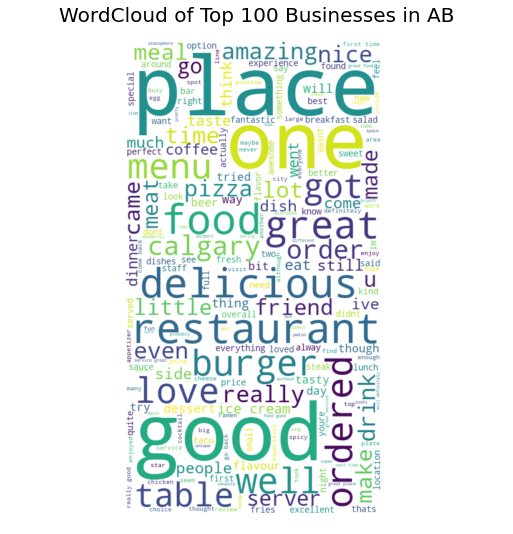

In [12]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('AB')

Alberta (Canada) has its Yelp businesses concentrated on Restaurants, followed by Shopping, Food, Beauty and Spas, then Automotive. Additionally, businesses that fall under the general category Food are the highest rated, with 69% of the reviews having a rating of 3.5 or higher. They also offer amenities such as business parking (32% of their establishments), bike parking (35% of their establishments) and restaurant take out (33% of their establishments).

## Arizona


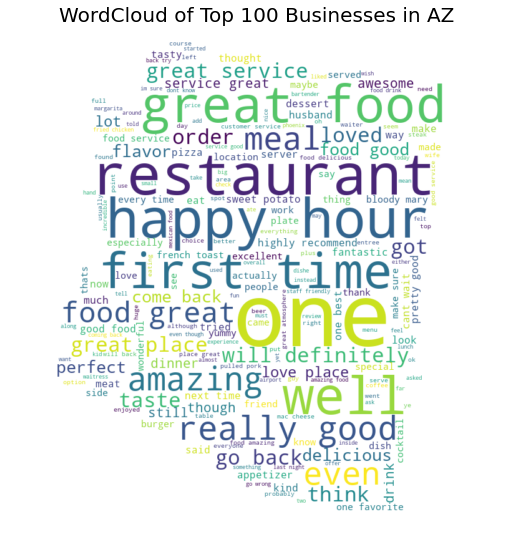

In [13]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('AZ')

Arizona (United States) and has Yelp businesses that are most commonly Restaurants, followed by Shopping, Health and Medical, Home Services, then Beauty and Spas. Another notable aspect is that for Arizona, both Health and Medical businesses and Home Service businesses are included in the top 5 most common general categories, whereas the majority of the other top 9 states do not include these in their top 5. Among these general categories, its highest rated are businesses that are classified as Beauty and Spas, with 81% of businesses having a 3.5 rating or higher. Looking at amenities, 74% of their businesses accept credit cards, 31% offer bike parking and 29% offer business parking. Many of the positive reviews left by customers are about businesses’ happy hours, that they would “go back”, and have generally good comments about restaurant food.

## North Carolina


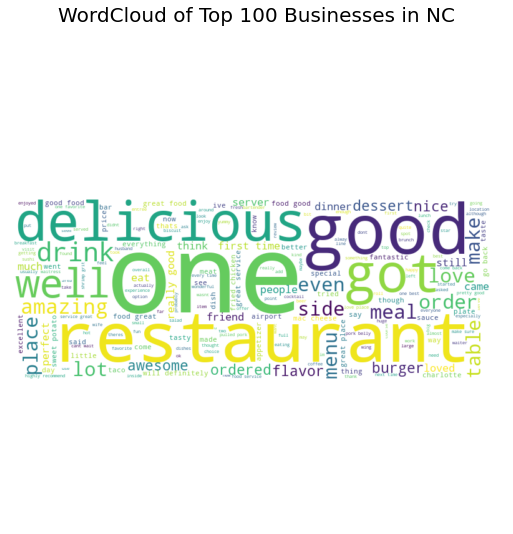

In [14]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('NC')

North Carolina (United States) and the most common businesses listed on Yelp are firstly Restaurants, then Shopping, Food, Beauty and Spas, and lastly, Health and Medical. Like Arizona, it has Health and Medical businesses among its most common general categories, while other states do not. Among the most common general categories, it has Food as its highest rated, with 75% of its businesses having a 3.5 rating or higher. Around 75% of its businesses accept credit cards as well.

## Nevada

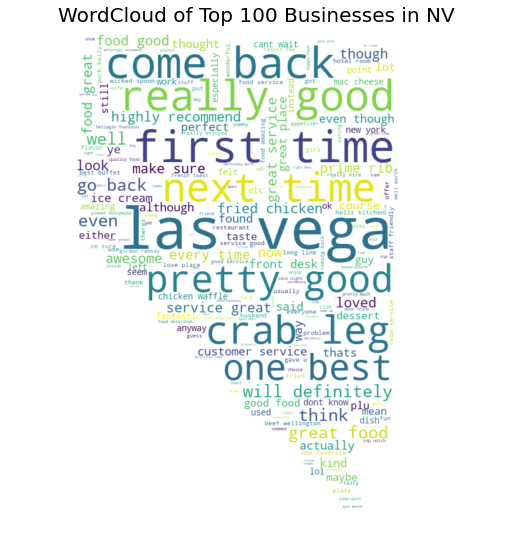

In [15]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('NV')

Nevada (United States) has a similar profile to that of Arizona. The general categories that are most common are similar to Arizona, with Restaurants at the top, followed by Shopping, Health and Medical, Beauty and Spas then Home Services. Both Health and Medical businesses and Home Service businesses are included in its top 5 most common general categories, unlike most of the other top 9 states. Among the most common establishments, Beauty and Spas are its highest rated general category, with 82% of establishments rate 3.5 or higher. Similarly, 74% of its establishments accept credit cards. Among the positive comments of its customers, the word “las vega” stands out, as it is near Las Vegas, and has potential to be used as a selling point of businesses in the state. Many customers also said they would “come back” and praised the food, including “crab leg” which may be a popular item.

## Ohio


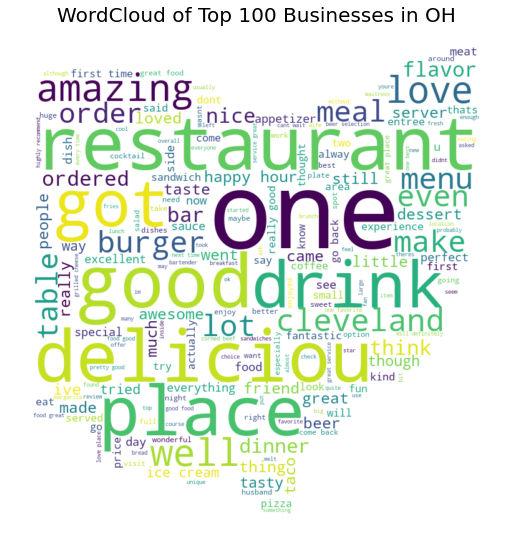

In [16]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('OH')

Ohio (United States) has a similar profile to that of Alberta (Canada). Its Yelp businesses concentrate on Restaurants, followed by Shopping, Food, Beauty and Spas, then Automotive. Among these, Food businesses stand out with their good ratings at 77%. Businesses also commonly accept credit cards, with 74% offering this amenity. 34% of businesses offer business parking and 34% offer restaurant takeout. Customers also left positive reviews about restaurants, praising their food as “delicious”, “good” and “amazing”. They mentioned “burger” which could indicate a popular choice of food. Cleveland was also mentioned many times in their reviews, because it is a popular destination in Ohio.

## Ontario 

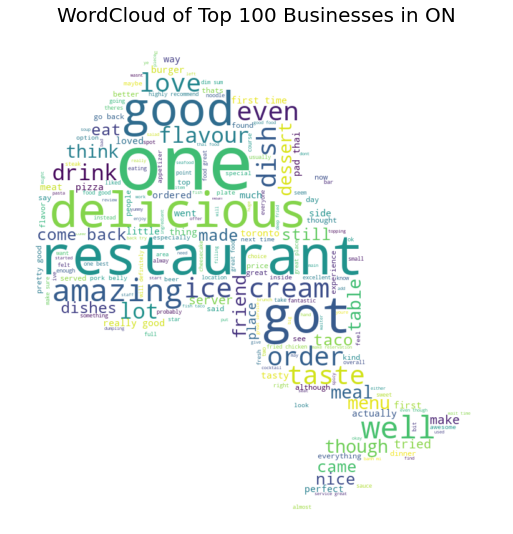

In [17]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('ON')

Compared to the previous states discussed, Ontario (Canada) has a higher percentage of Restaurants, which is their most common type of Yelp business. Food and Shopping follow with nearly equal amounts, then Beauty and Spas, and finally Nightlife. It is one out of two states inspected that included Nightlife in its top 5. And one of two states with Food as its second most common general category. Additionally, 65% of Ontario’s food businesses are rated good with customers particularly noting desserts in their reviews. In Ontario, the amenity that is offered by most businesses is restaurant take out, followed by bike parking then business parking. Around one third of its businesses are also good for kids. Customers that left positive reviews called businesses “good”, “delicious” and “amazing”. They also talked about “ice cream” and “dessert”, which can be noted as a popular taste.

## Pennsylvania


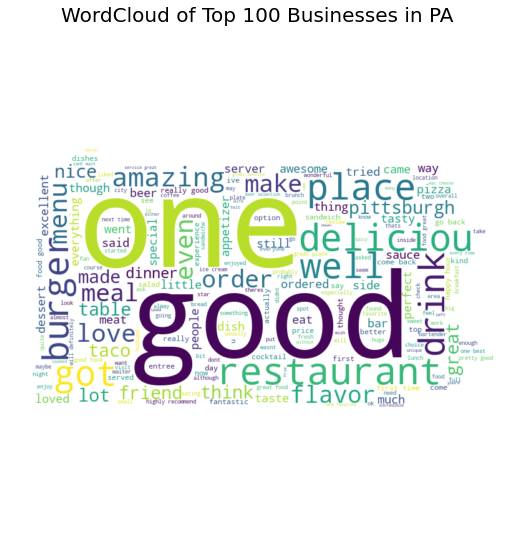

In [18]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('PA')

In Pennsylvania, around one fourth of its establishments are restaurants, which are its most common type of business. The next is Shopping, then Food, Beauty and Spas, and finally Automotive. Among these, the highest rated is Food, with around 76% of its businesses receiving good reviews. 74% of businesses accept credit cards, 37% of businesses offer business parking and 33% offer bike parking. Around one third of businesses also offer restaurant takeout. Customers in Pennsylvania gave positive reviews for businesses, describing them as “good” and “delicious”. They also spoke about “burger”, “drink” and “dinner”, which can be leveraged for advertising. “Pittsburgh”, which is a city in Pennsylvania, was also mentioned numerous times.

## Quebec

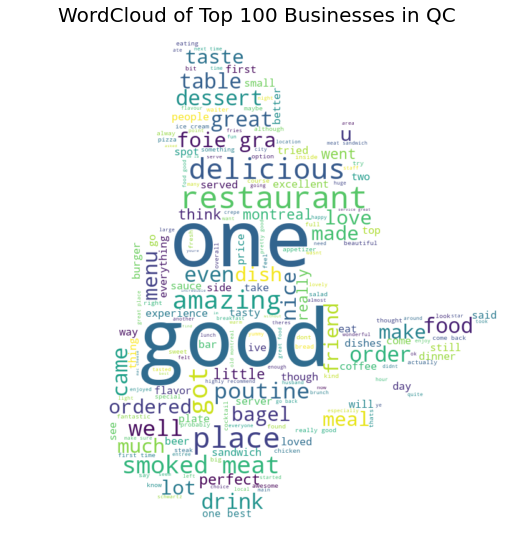

In [19]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('QC')

Quebec shares common categories with the other states such as Restaurants, Food, Shopping, Nightlife, then Hotels and Travel. It is the only state among those inspected with Hotels and Travel in its top 5, one out of two states that included Nightlife in its top 5, and one of two states with Food as its second most common general category. Its Food category stands out with its high distribution of good rating at 84%. In the reviews of Quebec’s top businesses, customers mentioned a unique selection of foods ranging from smoked meat to foie gra, which may be a reflection of it’s high ratings for its Food category. Customers have noted that 38% of businesses are good for kids, 23% have wifi, and 45% offer takeout. 28% of businesses offer parking and a higher 38% offer bike parking. Following the trend from other Canadian provinces, only 2% of businesses accept credit card.

## Wisconsin

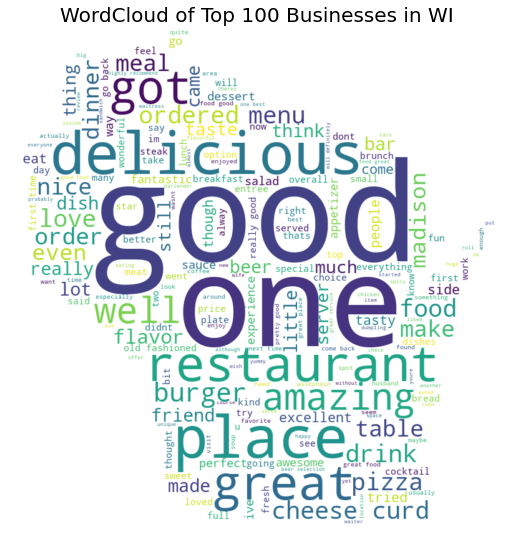

In [20]:
#![Alberta](./post_processed_data/wordcloud_AB.jpg)
generate_shape_wordcloud('WI')

Wisconsin has similar top general categories with the majority of the other states, with Restaurants as its most common, followed by Shopping, Food, Beauty and Spas, then Automotive. It is the one of three states inspected that has Nightlife included in its top 5. The Food and Beauty and Spas share a similar distribution of good ratings at 77% and 71%, but Restaurants have a low amount of good ratings at only 62%. Wisconsin’s customers often mention cheese curd (a local delicacy), burger, pizza, amongst other foods in their reviews . Wisconsin has the highest percentage of businesses with parking at 41% and bike parking at 43%. 76% of their businesses accept credit cards as payment option.

# Conclusion
Using the methodology described in detail above, the group was able to profile and provide personas for each of the 9 states that were chosen for the study. 

Based on the popularity of the establishments that can be found in the states, the group has provided the following personas to each of the states.

Alberta - **Eat and Shop** - Because Alberta has its Yelp businesses concentrated on Restaurants, followed by Shopping, Food, Beauty and Spas, then Nightlife, our group has called Alberta the Eat and Shop state. Additionally, businesses that fall under the general category Food are the highest rated, with 69% of the reviews having a rating of 3.5 or higher. 

Arizona - **Shop, Heal, Chill** - Arizona (United States) has Yelp businesses that are most commonly Restaurants, followed by Shopping, Health and Medical, Home Services, then Beauty and Spas. Because of this, our group has called Arizona the Shop, Heal, Chill state. Among these general categories, its highest rated are businesses that are classified as Beauty and Spas, with 81% of businesses having a 3.5 rating or higher.

Ohio - **Eat and Shop** - Ohio (United States) has Yelp businesses concentrating on Restaurants, followed by Shopping, Food, Beauty and Spas, then Nightlife. Among these, Food businesses stand out with their good ratings at 77%. 

Ontario - **Eat and Shop** - Ontario (Canada) has Yelp businesses focused on Restaurants, Shopping, Food, Beauty & Spas, Automotive. Because of this focus, our group has called Ontario the Eat and Shop state. 65% of Ontario’s food businesses are rated good with customers particularly noting desserts in their reviews.

Nevada - **Shop, Heal, Chill** - Nevada (United States) has business establishments that are mostly Restaurants, followed by Shopping, Health and Medical, Beauty and Spas then Home Services. Because of this, our group calls Nevada the Shop, Heal, Chill state. Both Health and Medical businesses and Home Service businesses are included in its top 5 most common general categories, unlike most of the other top 9 states. Among the most common establishments, Beauty and Spas are its highest rated general category.

North Carolina - **Shop and Chill** - With its focus on restaurants, shopping, beauty and spas, our group has called North Carolina, the Shop and Chill state. North Carolina has restaurants and health and medical businesses among its most common general categories.

Pennsylvania - **Shop and Chill** - Because Pennsylvania (United States) has its Yelp businesses mostly in Restaurants, closely followed by Shopping, Food, Beauty & Spas and Home Services, our group has called Pennsylvania the Shop and Chill state. Among it’s general categories, food is the most highly rated. 

Quebec - **Foodie** -  With its specific focus on restaurants and food establishments, the group has called Quebec the Foodie state. Quebec’s food establishments stand out with 83% of its ratings as good. In the reviews of Quebec’s top businesses, customers mentioned amongst other things: smoked meat, foie gra, bagel.

Wisconsin - **Shop and Chill** - Wisconsin (USA) has for its top categories, Restaurants, Shopping, Home Services, Beauty & Spas, and Food. Because of this, our group has called Wisconsin the Shop and Chill state.The Food and Beauty and Spas have good ratings of 75% and 74%. 

This study has shown that states can be characterized by the establishments that are reviewed on Yelp. Based on the business establishments, reviews, amenities and word clouds of the reviews, the group’s findings are consistent and coherent.



# Recommendations 

Despite the positive results of the study, the group acknowledges that this study can be improved further.

Given more time to process the data, our group would have wanted to also process the check-in information. This data could potentially have provided the exact time when the establishments were visited .For tourists, the presence or absence of a nightlife might be a factor in their decisions in visiting a state.

This study could be improved by getting more information regarding the states and getting more reviews per state.  Furthermore, some of the attributes did not have sufficient data.

Only 9 states had a significant amount of data. Having said this, the attributes and word cloud of the 9 states would be improved with the addition of more data. The group noticed that restaurants was one of the more common establishments

Aside from the 9 states that comprise 98 percentile of the data, the other states had very little data. Adding more states would provide richer information which can add more texture to the various profiles that the group had seen. 

The study could also be augmented with other sources of information such  as Twitter, Instagram and Facebook. While Yelp is a rich source of information especially when it comes to reviews of establishments, not everyone uses Yelp. There are those who prefer Twitter, Facebook and Instagram.

Ultimately, it seems possible to extend this study in the future by utilizing this same method to analyze cities in the Philippines and begin to attract tourists to bring the Philippines back on the road to recovery. Since Yelp is not commonly used in the Philippines, a possible replacement for the source of information would be TripAdvisor.


# Acknowledgements and References

[1] Caroll,J. (2020, February). The complete Yelp business category list, Retrieved from https://blog.yelp.com/2018/01/yelp_category_list.

[2] Holtz, Y. (2018). Use faceting for Radar Chart. Retrieved from Python Graph Gallery: https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart
[3] Nurfikri, F. (2020, May 19). Create Word Cloud into any Shape you want using Python. Retrieved from towards data science: https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32


[4] Holtz, Y. (2021, February). Sctacked and Percent Stacked Barplot using Seaborn. Retrieved from Python Graph Gallery: https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot/

[5]Comission for Environmental Cooperation. (2010). Retrieved from Comission for Environmental Cooperation Atlas: http://www5.cec.org/sites/default/files/Atlas/Files/Political_Boundaries/PoliticalBoundaries_Shapefiles.zip


[6] user1229108. (2012, February 23). Download Returned Zip file from URL. Retrieved from stackoverflow: https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url